https://www.kaggle.com/datasets/stevenpeutz/misinformation-fake-news-text-dataset-79k/code?resource=download

# Final Version


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_feature.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78588 entries, 0 to 78587
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   text                                  78588 non-null  object 
 1   label                                 78588 non-null  int64  
 2   text_without_stopwords                78588 non-null  object 
 3   vader_score                           78588 non-null  float64
 4   sentiment                             78588 non-null  int64  
 5   cluster                               78588 non-null  int64  
 6   no_of_sentences_original_news         78588 non-null  int64  
 7   avg_word_count_sentencewise_original  78588 non-null  float64
 8   word_count_nostopwords                78588 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 5.4+ MB


In [4]:
df.head(10)

,text,label,text_without_stopwords,vader_score,sentiment,cluster,no_of_sentences_original_news,avg_word_count_sentencewise_original,word_count_nostopwords
0,The head of a conservative Republican faction ...,0,head conservative Republican faction U.S. Cong...,0.9857,1,1,30,29.333333,880
1,Transgender people will be allowed for the fir...,0,Transgender people allowed first time enlist U...,0.9488,1,0,13,34.615385,450
2,The special counsel investigation of links bet...,0,special counsel investigation links Russia Pre...,-0.6808,0,1,17,30.470588,518
3,Trump campaign adviser George Papadopoulos tol...,0,Trump campaign adviser George Papadopoulos tol...,-0.2201,0,1,16,27.000000,432
4,President Donald Trump called on the U.S. Post...,0,President Donald Trump called U.S. Postal Serv...,0.5896,1,0,40,24.550000,982
5,The White House said on Friday it was set to k...,0,White House said Friday set kick talks next we...,0.6369,1,1,4,31.500000,126
6,President Donald Trump said on Thursday he bel...,0,President Donald Trump said Thursday believes ...,0.9814,1,1,26,23.846154,620
7,While the Fake News loves to talk about my so-...,0,Fake News loves talk so-called low approval ra...,0.5845,1,0,2,30.000000,60
8,"Together, we are MAKING AMERICA GREAT AGAIN! b...",0,"Together, MAKING AMERICA GREAT AGAIN! bit.ly/2...",0.7290,1,0,2,7.000000,14
9,Alabama Secretary of State John Merrill said h...,0,Alabama Secretary State John Merrill said cert...,0.4767,1,0,2,35.500000,71


In [5]:
# Clean and preprocess the text data
import re
df['text_without_stopwords'] = df['text_without_stopwords'].apply(lambda x: re.sub(r'[^\w\s]|(\b\w{1,3}\b)', '', str(x))) # remove symbols and short words

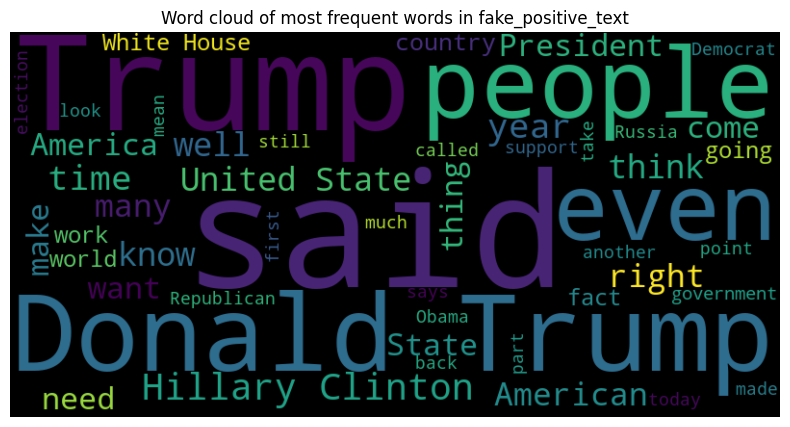

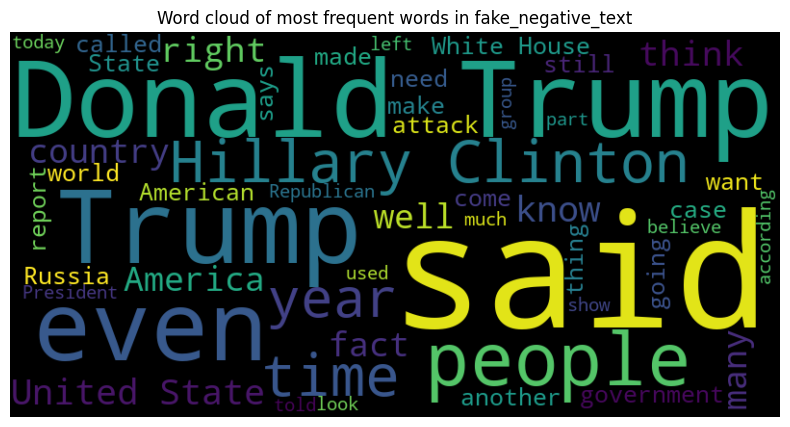

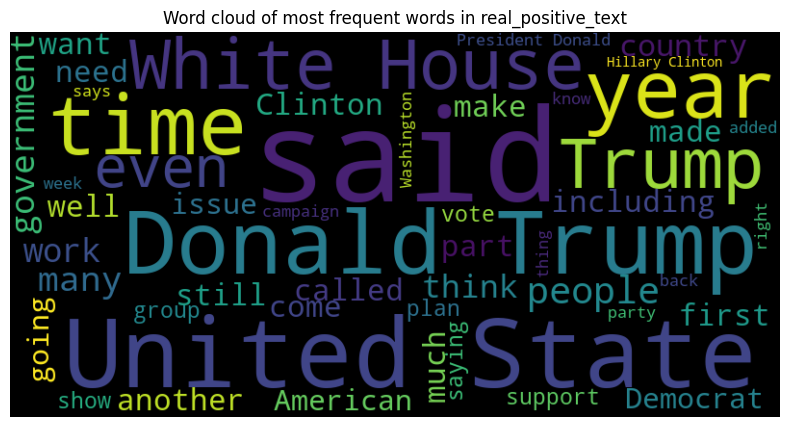

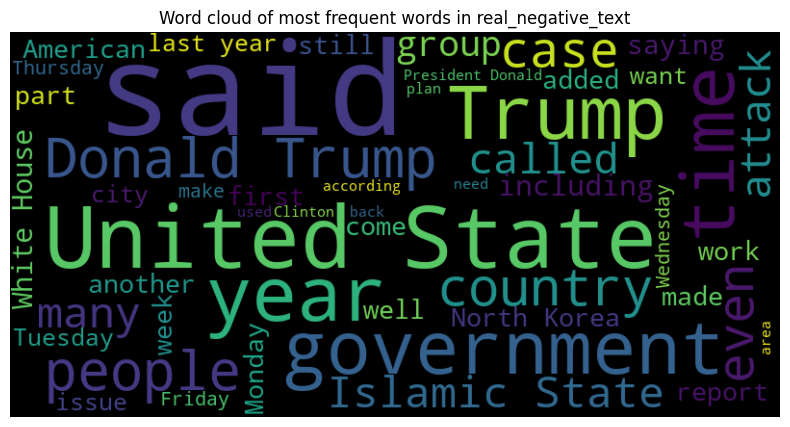

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fake_positive_text = df[(df['label'] == 1) & (df['sentiment'] == 1)]['text_without_stopwords'].str.cat(sep=' ')
fake_negative_text = df[(df['label'] == 1) & (df['sentiment'] == 0)]['text_without_stopwords'].str.cat(sep=' ')
real_positive_text = df[(df['label'] == 0) & (df['sentiment'] == 1)]['text_without_stopwords'].str.cat(sep=' ')
real_negative_text = df[(df['label'] == 0) & (df['sentiment'] == 0)]['text_without_stopwords'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, max_words=50).generate(fake_positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most frequent words in fake_positive_text')
plt.show()

wordcloud = WordCloud(width=800, height=400, max_words=50).generate(fake_negative_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most frequent words in fake_negative_text')
plt.show()


wordcloud = WordCloud(width=800, height=400, max_words=50).generate(real_positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most frequent words in real_positive_text')
plt.show()

wordcloud = WordCloud(width=800, height=400, max_words=50).generate(real_negative_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most frequent words in real_negative_text')
plt.show()

In [7]:
import nltk
import ssl
from nltk import FreqDist
import nltk
import matplotlib.pyplot as plt

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

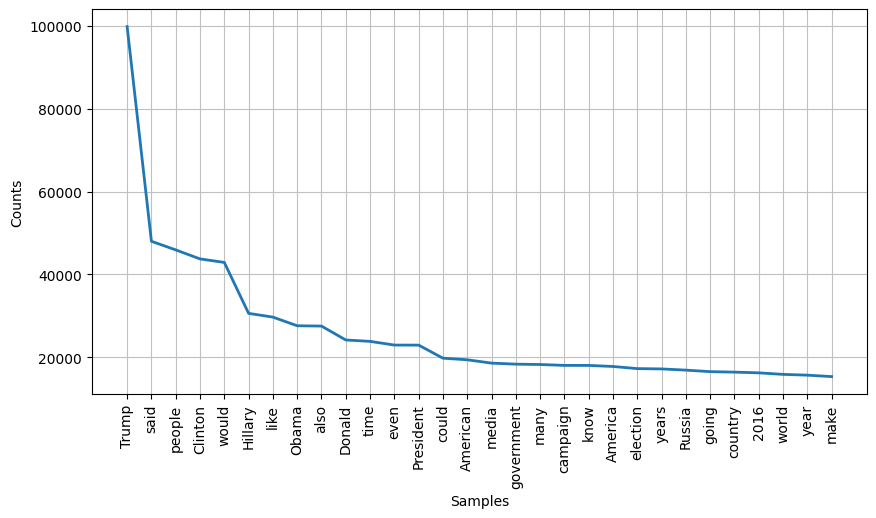

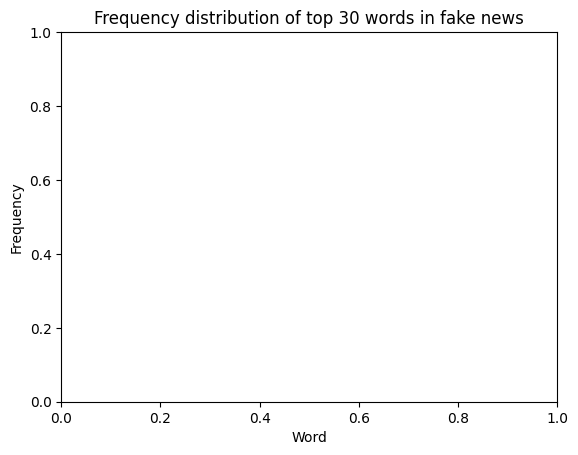

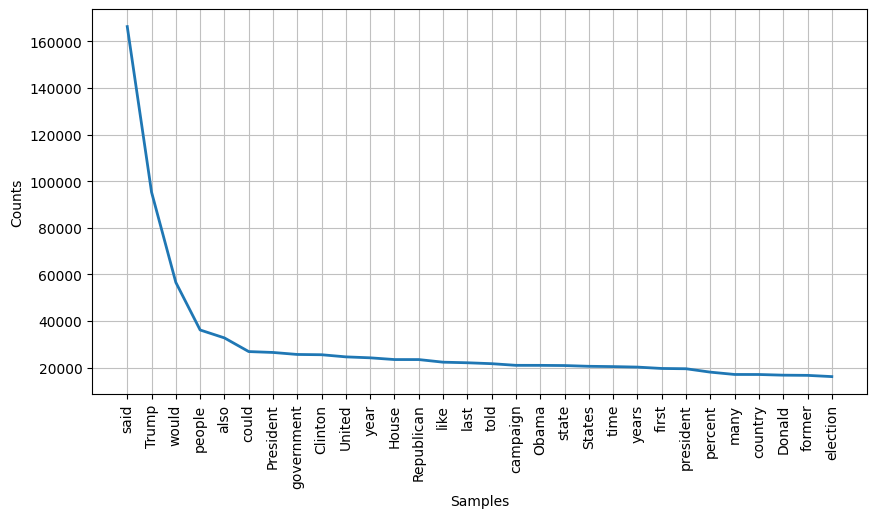

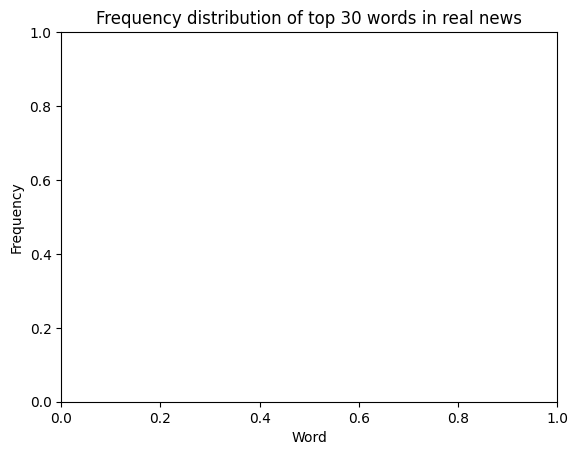

In [8]:
fake_text = df[df['label'] ==1 ]['text_without_stopwords'].str.cat(sep=' ')
real_text = df[df['label'] == 0]['text_without_stopwords'].str.cat(sep=' ')

fake_words = nltk.word_tokenize(fake_text)
real_words = nltk.word_tokenize(real_text)

fake_freq_dist = FreqDist(fake_words)
real_freq_dist = FreqDist(real_words)

plt.figure(figsize=(10,5))
fake_freq_dist.plot(30, cumulative=False)
plt.title('Frequency distribution of top 30 words in fake news')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,5))
real_freq_dist.plot(30, cumulative=False)
plt.title('Frequency distribution of top 30 words in real news')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

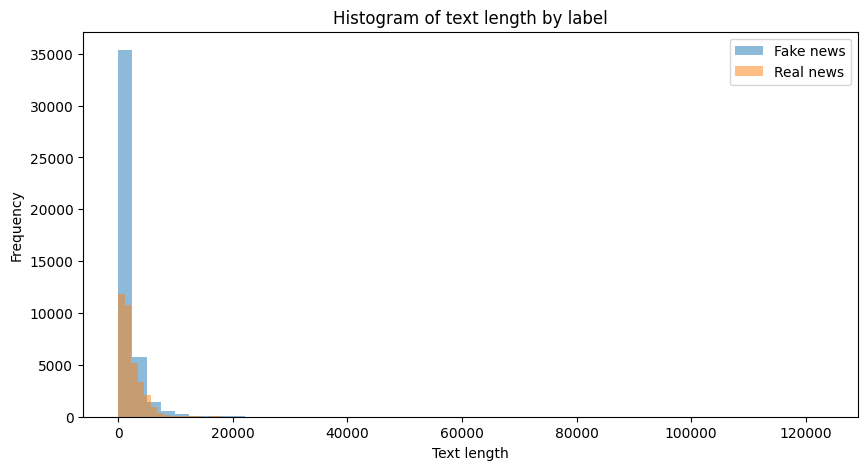

In [9]:
fake_lengths = df[df['label'] == 1]['text_without_stopwords'].apply(lambda x: len(x))
real_lengths = df[df['label'] == 0]['text_without_stopwords'].apply(lambda x: len(x))

plt.figure(figsize=(10,5))
plt.hist(fake_lengths, bins=50, alpha=0.5, label='Fake news')
plt.hist(real_lengths, bins=50, alpha=0.5, label='Real news')
plt.title('Histogram of text length by label')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

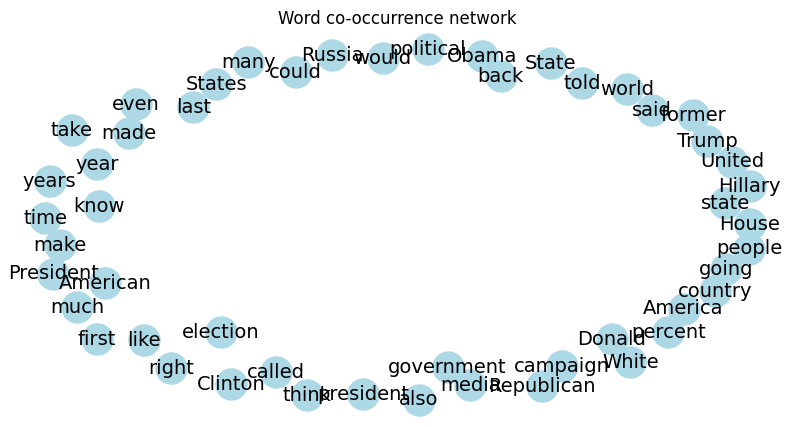

In [10]:
import networkx as nx

text = df['text_without_stopwords'].str.cat(sep=' ')
words = nltk.word_tokenize(text)
freq_dist = FreqDist(words)
top_words = [word[0] for word in freq_dist.most_common(50)]
word_pairs = [(top_words[i], top_words[j]) for i in range(len(top_words)) for j in range(i+1, len(top_words)) if i != j]
word_cooccur = FreqDist(word_pairs)
G = nx.Graph()
for word in top_words:
    G.add_node(word)
for pair, freq in word_cooccur.items():
    if freq > 5:
        G.add_edge(pair[0], pair[1], weight=freq)

plt.figure(figsize=(10,5))
pos = nx.spring_layout(G, k=2)
nx.draw_networkx(G, pos, node_size=500, node_color='lightblue', edge_color='gray', font_size=14, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Word co-occurrence network')
plt.axis('off')
plt.show()

/var/folders/xm/vjrzc4wn53d718fm7fplz4rh0000gn/T/ipykernel_60044/2670087290.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


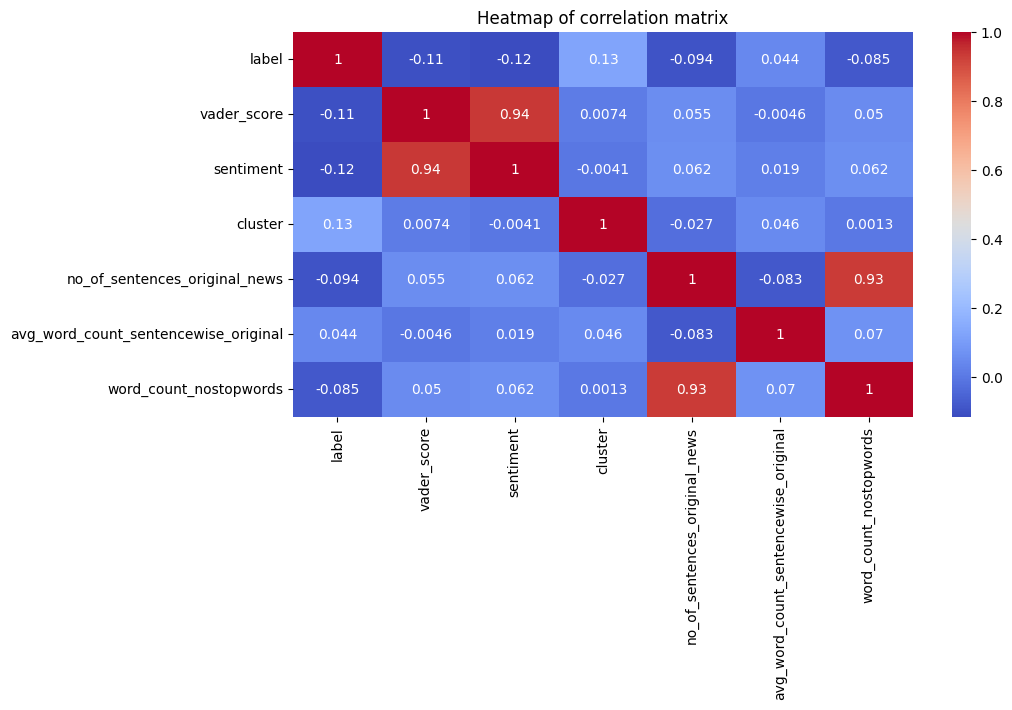

In [11]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of correlation matrix')
plt.show()

In [12]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt


def preprocess_text(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

#Preprocess text
preprocessed_text = [preprocess_text(text) for text in df['text_without_stopwords']]

# Create dictionary and corpus
dictionary = corpora.Dictionary(preprocessed_text)
corpus = [dictionary.doc2bow(text) for text in preprocessed_text]

num_topics = 5 #Should be number of Clusters
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha='auto')


In [13]:
# Print topics and top words
for topic_id in range(num_topics):
    print(f"Topic {topic_id}: {lda_model.print_topic(topic_id)}\n")

# Visualize topics
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topic 0: 0.014*"russia" + 0.008*"russian" + 0.007*"military" + 0.007*"ukraine" + 0.007*"syria" + 0.006*"said" + 0.006*"government" + 0.005*"states" + 0.005*"united" + 0.005*"state"

Topic 1: 0.013*"trump" + 0.008*"people" + 0.006*"clinton" + 0.006*"like" + 0.006*"hillary" + 0.005*"said" + 0.004*"time" + 0.004*"media" + 0.004*"election" + 0.004*"know"

Topic 2: 0.018*"obama" + 0.016*"republican" + 0.014*"vote" + 0.013*"trump" + 0.013*"republicans" + 0.012*"party" + 0.011*"democrats" + 0.010*"president" + 0.010*"house" + 0.009*"democratic"

Topic 3: 0.020*"clinton" + 0.009*"trump" + 0.009*"said" + 0.008*"hillary" + 0.007*"state" + 0.007*"emails" + 0.007*"investigation" + 0.006*"president" + 0.006*"department" + 0.006*"email"

Topic 4: 0.005*"people" + 0.004*"world" + 0.004*"government" + 0.004*"money" + 0.004*"years" + 0.003*"water" + 0.003*"year" + 0.003*"million" + 0.003*"percent" + 0.003*"like"



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [14]:
# Save the model
lda_model.save('my_lda_model')

In [16]:
lda_model.print_topics()

[(0,
  '0.014*"russia" + 0.008*"russian" + 0.007*"military" + 0.007*"ukraine" + 0.007*"syria" + 0.006*"said" + 0.006*"government" + 0.005*"states" + 0.005*"united" + 0.005*"state"'),
 (1,
  '0.013*"trump" + 0.008*"people" + 0.006*"clinton" + 0.006*"like" + 0.006*"hillary" + 0.005*"said" + 0.004*"time" + 0.004*"media" + 0.004*"election" + 0.004*"know"'),
 (2,
  '0.018*"obama" + 0.016*"republican" + 0.014*"vote" + 0.013*"trump" + 0.013*"republicans" + 0.012*"party" + 0.011*"democrats" + 0.010*"president" + 0.010*"house" + 0.009*"democratic"'),
 (3,
  '0.020*"clinton" + 0.009*"trump" + 0.009*"said" + 0.008*"hillary" + 0.007*"state" + 0.007*"emails" + 0.007*"investigation" + 0.006*"president" + 0.006*"department" + 0.006*"email"'),
 (4,
  '0.005*"people" + 0.004*"world" + 0.004*"government" + 0.004*"money" + 0.004*"years" + 0.003*"water" + 0.003*"year" + 0.003*"million" + 0.003*"percent" + 0.003*"like"')]